<a href="https://colab.research.google.com/github/Narae00/DeepLearning/blob/main/AutoEncoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
#AutoEncoder.py
%%writefile AutoEncoder.py
import tensorflow as tf

class AutoEncoder:
  def __init__(self):
    self.encoder= None
    self.decoder= None
    self.en_decoder= None
    self.relu= tf.keras.activations.relu
    self.tanh= tf.keras.activations.tanh
    self.input_output_dim= 784
    self.encoder_hidden_layers= [200, 200]
    self.decoder_hidden_layers= [200, 200]
    self.code_dim= 32
  def build_model(self):
  # Build Encoder
    encoder_input= tf.keras.layers.Input(shape=(self.input_output_dim, ), dtype=tf.float32)
    encoder_h_layer= encoder_input
    for dim in self.encoder_hidden_layers:
      encoder_h_layer= tf.keras.layers.Dense(
          units=dim, activation=self.relu, use_bias=True
          )(encoder_h_layer)
    code = tf.keras.layers.Dense(
        units=self.code_dim, activation=self.tanh, use_bias=True
        )(encoder_h_layer)
    self.encoder= tf.keras.models.Model(inputs=encoder_input, outputs=code)
    # Build Decoder
    decoder_input= tf.keras.layers.Input(shape=(self.code_dim, ), dtype=tf.float32)
    decoder_h_layer= decoder_input
    for dim in self.decoder_hidden_layers:
      decoder_h_layer= tf.keras.layers.Dense(
          units=dim, activation=self.relu, use_bias=True
          )(decoder_h_layer)

    decoder_output= tf.keras.layers.Dense(
      units=self.input_output_dim, activation=None, use_bias=True
    )(decoder_h_layer)
    self.decoder= tf.keras.models.Model(inputs=decoder_input, outputs=decoder_output)

    # En-Decoder
    vae_output= self.decoder(code)
    self.en_decoder= tf.keras.models.Model(inputs=encoder_input, outputs=vae_output)
    optimizer_alg= tf.keras.optimizers.Adam(learning_rate=0.001)
    mse= tf.keras.losses.mse
    self.en_decoder.compile(optimizer=optimizer_alg, loss=mse)

  def fit(self, x, y, batch_size, epochs):
    self.en_decoder.fit(x=x, y=y, batch_size=batch_size, epochs=epochs)

  def save_weights(self, save_path):
    self.en_decoder.save_weights(save_path)

  def load_weights(self, load_path):
    self.en_decoder.load_weights(load_path)

Overwriting AutoEncoder.py


In [36]:
import tensorflow as tf
import matplotlib.pyplot as plt

class MNISTData:
    def __init__(self, training_data_ratio=0.9):
        self.training_data_ratio = training_data_ratio
        self.x_train = None
        self.y_train = None
        self.x_test = None
        self.y_test = None
        self.in_out_dim = None
        self.width = None
        self.height = None

    def load_data(self):
        mnist_train_data, mnist_test_data = tf.keras.datasets.mnist.load_data()

        self.x_train, self.y_train = mnist_train_data
        self.x_test, self.y_test = mnist_test_data

        # test code - begin
        # MNISTData.print_image(self.x_train[0])
        train_size = len(self.x_train)
        test_size = len(self.x_test)
        print("data size before split: train: %d, test: %d" % (train_size, test_size))

        # test code - end
        self.x_train = MNISTData.preprocessing_x(self.x_train)
        self.x_test = MNISTData.preprocessing_x(self.x_test)

        train_size = len(self.x_train)
        test_size = len(self.x_test)

        # test code
        # MNISTData.print_image(self.x_train[0])
        self.width = self.x_train.shape[1]
        self.height = self.x_train.shape[2]
        w_by_h = self.x_train.shape[1] * self.x_train.shape[2]
        self.x_train = self.x_train.reshape(train_size, w_by_h).astype("float32")
        self.x_test = self.x_test.reshape(test_size, w_by_h).astype("float32")
        self.in_out_dim = w_by_h

        print("data size: train: %d, test: %d" % (train_size, test_size))

    def load_data_fashion(self):
        mnist_train_data, mnist_test_data = tf.keras.datasets.fashion_mnist.load_data()

        self.x_train, self.y_train = mnist_train_data
        self.x_test, self.y_test = mnist_test_data

        # test code - begin
        train_size = len(self.x_train)
        test_size = len(self.x_test)
        print("data size before split: train: %d, test: %d" % (train_size, test_size))

        # test code - end
        self.x_train = MNISTData.preprocessing_x(self.x_train)
        self.x_test = MNISTData.preprocessing_x(self.x_test)

        train_size = len(self.x_train)
        test_size = len(self.x_test)

        # test code
        self.width = self.x_train.shape[1]
        self.height = self.x_train.shape[2]
        w_by_h = self.x_train.shape[1] * self.x_train.shape[2]
        self.x_train = self.x_train.reshape(train_size, w_by_h).astype("float32")
        self.x_test = self.x_test.reshape(test_size, w_by_h).astype("float32")
        self.in_out_dim = w_by_h

        print("data size: train: %d, test: %d" % (train_size, test_size))

    @staticmethod
    def preprocessing_x(x_data):
        x_data = x_data/float(255.0)
        return x_data

    @staticmethod
    def print_image(img_data):
        plt.figure()
        plt.imshow(img_data)
        plt.colorbar()
        plt.grid(False)
        plt.show()

    @staticmethod
    def print_56_pair_images(img_data_list1, img_data_list2, label_list):
        num_row = 7
        num_col = 16
        num_pairs = num_row * num_col
        plt.figure(figsize=(10, 8))
        plt.title("Digit pairs")
        num_images = img_data_list1.shape[0]

        if num_images > num_pairs:
            num_images = num_pairs

        for i in range(num_images):
            plt.subplot(num_row, num_col, 2*i+1)
            plt.xticks([])
            plt.yticks([])
            plt.grid(False)
            plt.imshow(img_data_list1[i], cmap=plt.cm.binary)
            plt.xlabel(label_list[i])

        for i in range(num_images):
            plt.subplot(num_row, num_col, 2*(i+1))
            plt.xticks([])
            plt.yticks([])
            plt.grid(False)
            plt.imshow(img_data_list2[i], cmap=plt.cm.binary)
            plt.xlabel(label_list[i])

        plt.show()

    @staticmethod
    def print_10_images(img_data_list, label_list):
        num_row = 2
        num_col = 5
        num_prints = num_row * num_col
        plt.figure(figsize=(10, 8))
        plt.title("Digit pairs")
        num_images = img_data_list.shape[0]

        if num_prints > num_images:
            num_prints = num_images

        for i in range(num_prints):
            plt.subplot(num_row, num_col, i+1)
            plt.xticks([])
            plt.yticks([])
            plt.grid(False)
            plt.imshow(img_data_list[i], cmap=plt.cm.binary)
            plt.xlabel(label_list[i])

        plt.show()

    @staticmethod
    def print_10_pair_images(img_data_list1, img_data_list2, label_list):
        num_row = 5
        num_col = 4
        num_pairs = num_row * num_col
        plt.figure(figsize=(10, 8))
        plt.title("Digit pairs")
        num_images = 10

        if num_images > num_pairs:
            num_images = num_pairs

        for i in range(num_images):
            plt.subplot(num_row, num_col, 2*i+1)
            plt.xticks([])
            plt.yticks([])
            plt.grid(False)
            plt.imshow(img_data_list1[i], cmap=plt.cm.binary)
            plt.xlabel(label_list[i])

        for i in range(num_images):
            plt.subplot(num_row, num_col, 2*(i+1))
            plt.xticks([])
            plt.yticks([])
            plt.grid(False)
            plt.imshow(img_data_list2[i], cmap=plt.cm.binary)
            plt.xlabel(label_list[i])

        plt.show()


In [37]:
#main.py
from MNISTData import MNISTData
from AutoEncoder import AutoEncoder


if __name__=="__main__":
  print("Hi. I am an Auto Encoder Trainer.")
  batch_size = 32
  num_epochs = 5

  data_loader = MNISTData()
  data_loader.load_data()

  x_train = data_loader.x_train
  input_output_dim = data_loader.in_out_dim
  auto_encoder = AutoEncoder()
  auto_encoder.build_model()
  auto_encoder.fit(x=x_train, y=x_train, batch_size=batch_size, epochs=num_epochs)

  save_path = "./models/ae_model.weights.h5"
  #auto_encoder.save_model(save_path)
  print("load model weights from %s" %save_path)


Hi. I am an Auto Encoder Trainer.
data size before split: train: 60000, test: 10000
data size: train: 60000, test: 10000
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - loss: 0.0313
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - loss: 0.0149
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - loss: 0.0133
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - loss: 0.0124
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - loss: 0.0117
load model weights from ./models/ae_model.weights.h5


Hi. I am an AutoEncoderTester.
data size before split: train: 60000, test: 10000


data size: train: 60000, test: 10000
load model weights from ./model/ae_model.weights.h5
const by codes
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


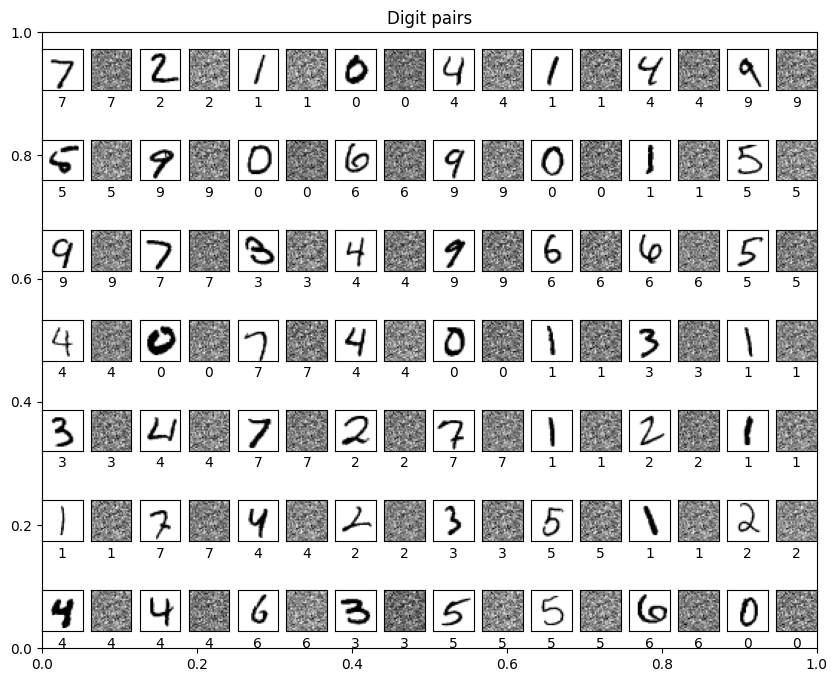

const by code means for each digit
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


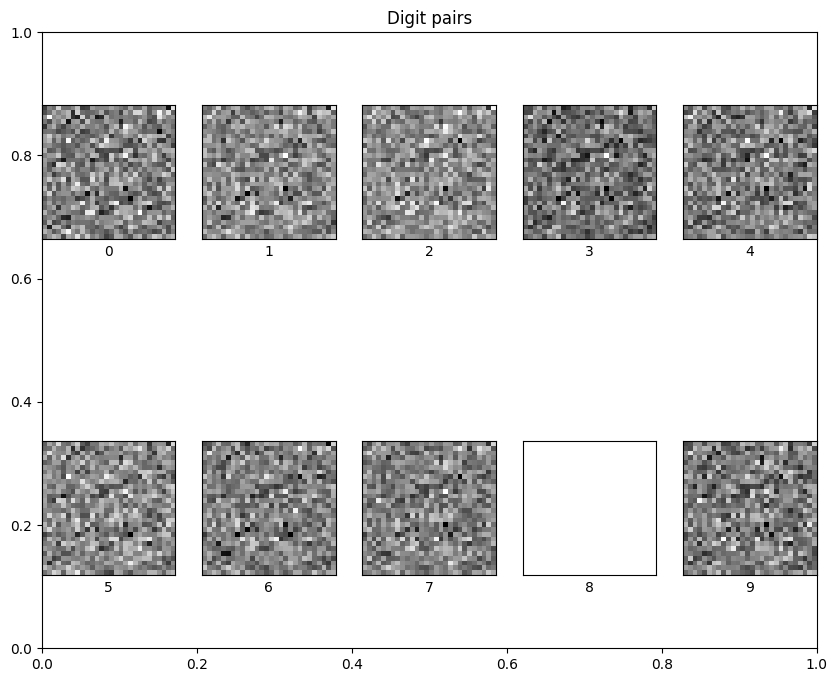

In [38]:
#main_test.py


import tensorflow as tf
from MNISTData import MNISTData
from AutoEncoder import AutoEncoder
import numpy as np

if __name__ == "__main__":
  print("Hi. I am an AutoEncoderTester.")
  batch_size= 32
  num_epochs= 5
  data_loader= MNISTData()
  data_loader.load_data()
  x_train= data_loader.x_train
  input_output_dim= data_loader.in_out_dim

  auto_encoder= AutoEncoder()
  auto_encoder.build_model()
  load_path= "./model/ae_model.weights.h5"
  print("load model weights from %s" % load_path)
  #auto_encoder.load_weights(load_path)
  # print for test
  num_test_items= 56
  test_data= data_loader.x_test[0:num_test_items, :]
  test_label= data_loader.y_test[0:num_test_items]
  test_data_x_print= test_data.reshape(num_test_items, data_loader.width, data_loader.height)

  print("const by codes")
  reconst_data= auto_encoder.en_decoder.predict(test_data)
  reconst_data_x_print= reconst_data.reshape(num_test_items, data_loader.width, data_loader.height)
  reconst_data_x_print= tf.math.sigmoid(reconst_data_x_print)
  MNISTData.print_56_pair_images(test_data_x_print, reconst_data_x_print, test_label)
  print("const by code means for each digit")
  avg_codes= np.zeros([10, 32])
  avg_add_cnt= np.zeros([10])

  latent_vecs= auto_encoder.encoder.predict(test_data)
  for i, label in enumerate(test_label):
    avg_codes[label] = latent_vecs[i]
    avg_add_cnt[label] += 1.0
    for i in range(10):
      if avg_add_cnt[label] > 0.1:
        avg_codes[i] /= avg_add_cnt[label]

  avg_code_tensor= tf.convert_to_tensor(avg_codes)
  reconst_data_by_vecs= auto_encoder.decoder.predict(avg_code_tensor)
  reconst_data_x_by_mean_print= reconst_data_by_vecs.reshape(10, data_loader.width, data_loader.height)
  label_list= [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
  MNISTData.print_10_images(reconst_data_x_by_mean_print, label_list)